# Assignment 2b Due: 9/14

Please submit this assignment as Assignment2b_FirstName_LastName

In this assignment you will explore fitting data and assessing how well your fit describes the different data sets.

Assignment Overview:
* Fit data and use $\chi^2$ and the $\chi^2$ test to assess 
* Analyze the efficiency of your data provided differnt threshold levels using your fit results 

For this assingment you can make use of the numpy, matplotlib, and the scipy packages.

In [533]:
#specify imports here
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy
from scipy import integrate
from scipy.optimize import curve_fit
import scipy.special as sp

%matplotlib notebook


# Problem 1: W Boson Mass

Finding the *true* values of a quantity relies on analyzing results for many experiments. One quantity that has been measured many times is the W boson mass see Wikipedia https://en.wikipedia.org/wiki/W_and_Z_bosons and the particle data group (PDG) https://pdg.lbl.gov/2018/listings/rpp2018-list-w-boson.pdf 

**a)** In this problem you will analyze measurements of the W boson from various experiments and determine if the values are consistnet and given this data set, what the best fit value is. Start by reading in the data file Wmass_data.txt, which contains an experiment number, W mass in units of $GeV/c^2$ and its uncertainty.



[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[80.37  80.375 80.387 80.336 80.415 80.27  80.44  80.483 80.433]
[0.018 0.023 0.019 0.067 0.052 0.055 0.051 0.084 0.079]


<IPython.core.display.Javascript object>


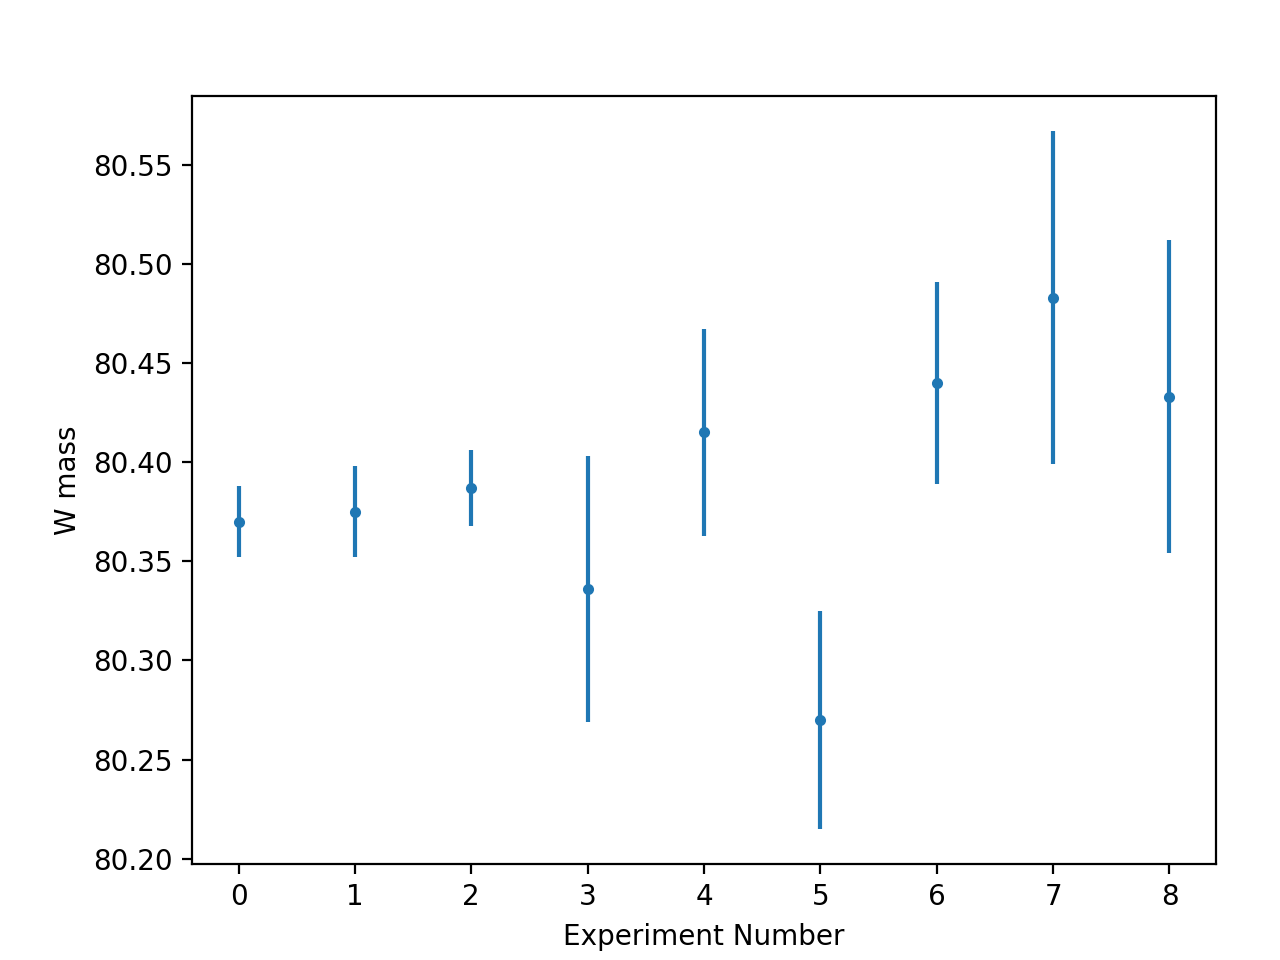

In [534]:
w = open ("/Users/tannishtha_nandi/Desktop/Wmass_data.txt")
N, wmass, uw = np.loadtxt ("/Users/tannishtha_nandi/Desktop/Wmass_data.txt", unpack = True)
print (N)
print (wmass)
print (uw)

fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(N, wmass, yerr = uw, fmt='.')
axes.set_xlabel('Experiment Number')
axes.set_ylabel('W mass');



**b)** Compute the error weighted mean of the W mass and its uncertainty. How does the weighted mean compare to the bold faced average of the PDG?

In [535]:
wmean = np.sum(wmass/uw**2)/np.sum(1.0/uw**2)
print('Weighted Mean',wmean)
wsduw = ((np.average((wmass-wmean)**2, weights=uw))/(len(N)-1))**0.5
print('Weighted Standard Deviation of Uncertainty',wsduw)
wsum = 1/ (wsduw)**2
print("Weighted sum",wsum)

def func (s, t):
    return t
            
popt, pcov = curve_fit(func ,N, wmass, sigma = uw, absolute_sigma = True)
print ('Popt', popt)
print ('Covariance',pcov)

print ("The weighted mean and the Bold Faced average of the PDG are equal to each other")

Weighted Mean 80.37914612783634
Weighted Standard Deviation of Uncertainty 0.024627969700910215
Weighted sum 1648.7043308780255
Popt [80.37914613]
Covariance [[0.00010688]]
The weighted mean and the Bold Faced average of the PDG are equal to each other


**c)** Calculate the $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value. The p-value can be calculated using *gammaincc(dof / 2.0, chisq / 2.0)* from *scipy.special*. Based on the p-value are the data consistant?

In [536]:
chisq = np.sum ((wmass-func(N,*popt))**2/uw**2)
dof = len (N) - len(popt)-1
rchisq = chisq/dof
pvalue = sp.gammaincc(dof/2.0, chisq/2.0)

print ("Chi Square",chisq)
print ("Degree of Freedom",dof)
print ("Reduced Chi Square",rchisq)
print ("P value",pvalue)

#print("The data seems consistent")


Chi Square 8.706836513332618
Degree of Freedom 7
Reduced Chi Square 1.2438337876189454
P value 0.27439480922611664


**d)** Plot the measurement number vs. the W mass. Don't forget to include the error bars on the W mass measurements. Then Fit a line of the form $y = p_0$, where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

<IPython.core.display.Javascript object>


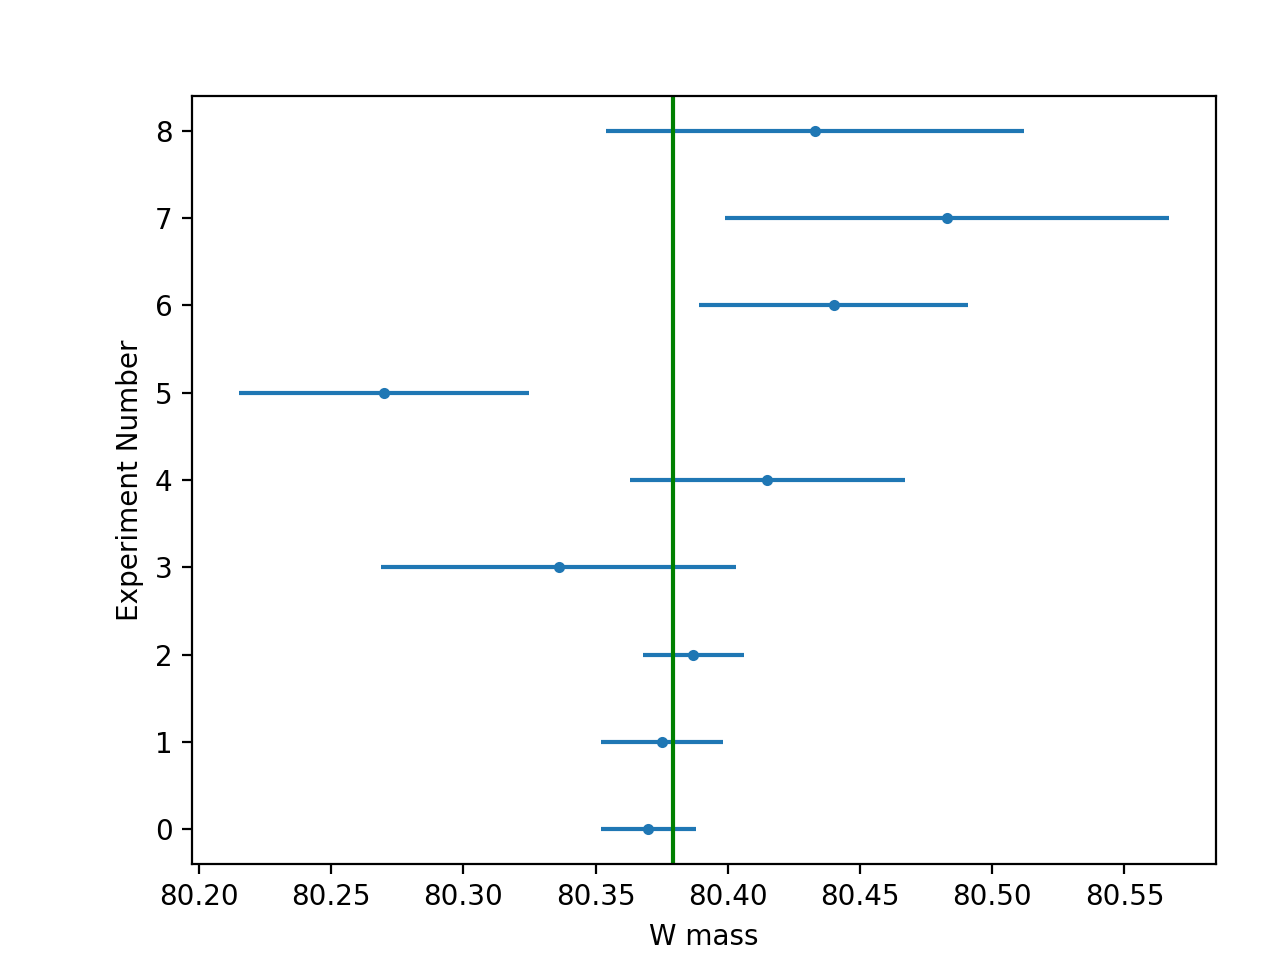

The po value is same as the weighted mean


In [538]:
fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(wmass, N, xerr = uw, fmt='.')
axes.set_ylabel('Experiment Number')
axes.set_xlabel('W mass');
plt.axvline ( x = popt, color= 'g');
print("The po value is same as the weighted mean")

# Problem 2: Proton Charge Radius

We will carry an identical analysis as we did in Problem 1, but on a different quantity, the proton charge radius. The proton charge radius has been a recent hot topic in the nuclear physics field, as new designed experiments using muonic hydorgen have made very percise measurements of it. See https://www.nature.com/articles/s41586-019-1721-2

**a)** Import the data set proton_radius_data.txt, which includes the experiment number, the proton charge radius, and its uncertainty measured in $fm$. 

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[0.8335  0.895   0.916   0.8775  0.875   0.879   0.912   0.871   0.84148
 0.8768  0.844   0.897   0.875   0.895   0.84087]
[0.0095  0.0198  0.024   0.0051  0.01    0.00781 0.0114  0.00949 0.00067
 0.0069  0.006   0.018   0.0068  0.0164  0.00039]


<IPython.core.display.Javascript object>


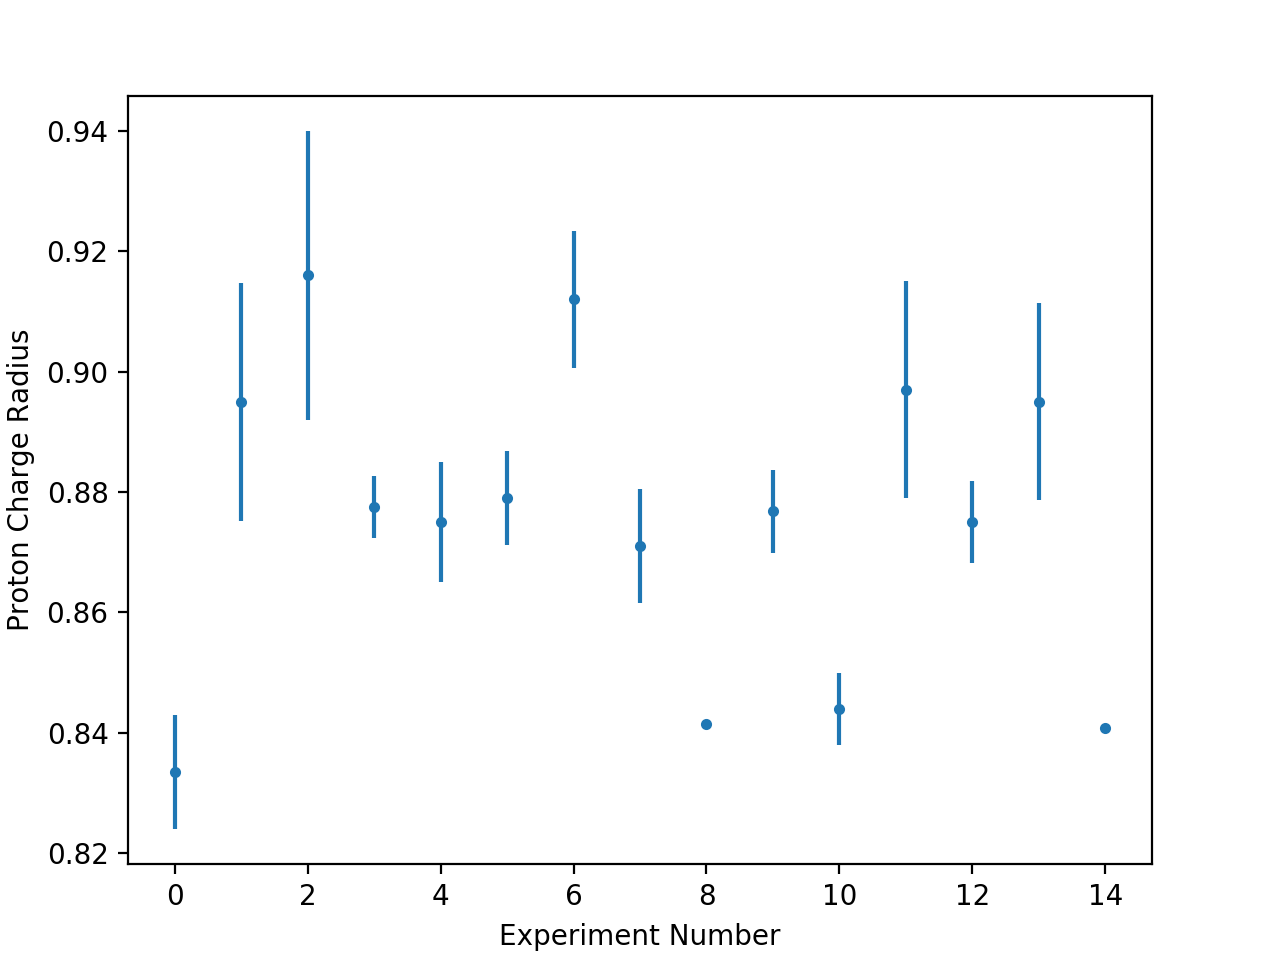

In [514]:
r = open ("/Users/tannishtha_nandi/Desktop/proton_radius_data.txt")
N, pcr, up = np.loadtxt ("/Users/tannishtha_nandi/Desktop/proton_radius_data.txt", unpack = True)
print (N)
print (pcr)
print (up)

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.errorbar(N, pcr, yerr = up , fmt='.')
axes.set_xlabel('Experiment Number')
axes.set_ylabel('Proton Charge Radius');


**b)** Compute the error weighted mean of the proton charge radius and its uncertainty. 

You can also compare this to the PDG value (pgs. 6 and 7): https://pdg.lbl.gov/2018/listings/rpp2018-list-p.pdf 

In [576]:
pmean = np.sum(pcr/up**2)/np.sum(1.0/up**2)
print('Weighted Mean',pmean)
wsdup = ((np.average((pcr-pmean)**2, weights=up))/(len(N)-1))**0.5
print('Weighted Standard Deviation of Uncertainty',wsdup)

def f (x, y):
    return y
            
popt, pcov = curve_fit(f ,N, pcr, sigma = up, absolute_sigma = True)
print ('Popt', popt)
print ('Covariance',pcov)


Weighted Mean 0.8416225242550588


TypeError: object of type 'int' has no len()

**c)** Calculate the  $\chi^2$, degrees of freedom, reduced $\chi^2$ and p-value. Based on the p-value are the data consistant? Do you see what all of the fuss is about.

In [520]:
chisq = np.sum ((pcr-func(N, *popt))**2/up**2)
dof = len (N) - len(popt)-1
rchisq = chisq/dof
pvalue = sp.gammaincc(dof/2.0, chisq/2.0)

print ("Chi Square",chisq)
print ("Degree of Freedom",dof)
print ("Reduced Chi Square",rchisq)
print ("P value",pvalue)

#print("The data seems consistent")


TypeError: func() takes 2 positional arguments but 7 were given

**d)** Plot the measurement number vs. the proton charge radius. Don't forget to include the error bars on the proton charge radius measurements. Then Fit a line of the form  $y = p_0$ , where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

<IPython.core.display.Javascript object>


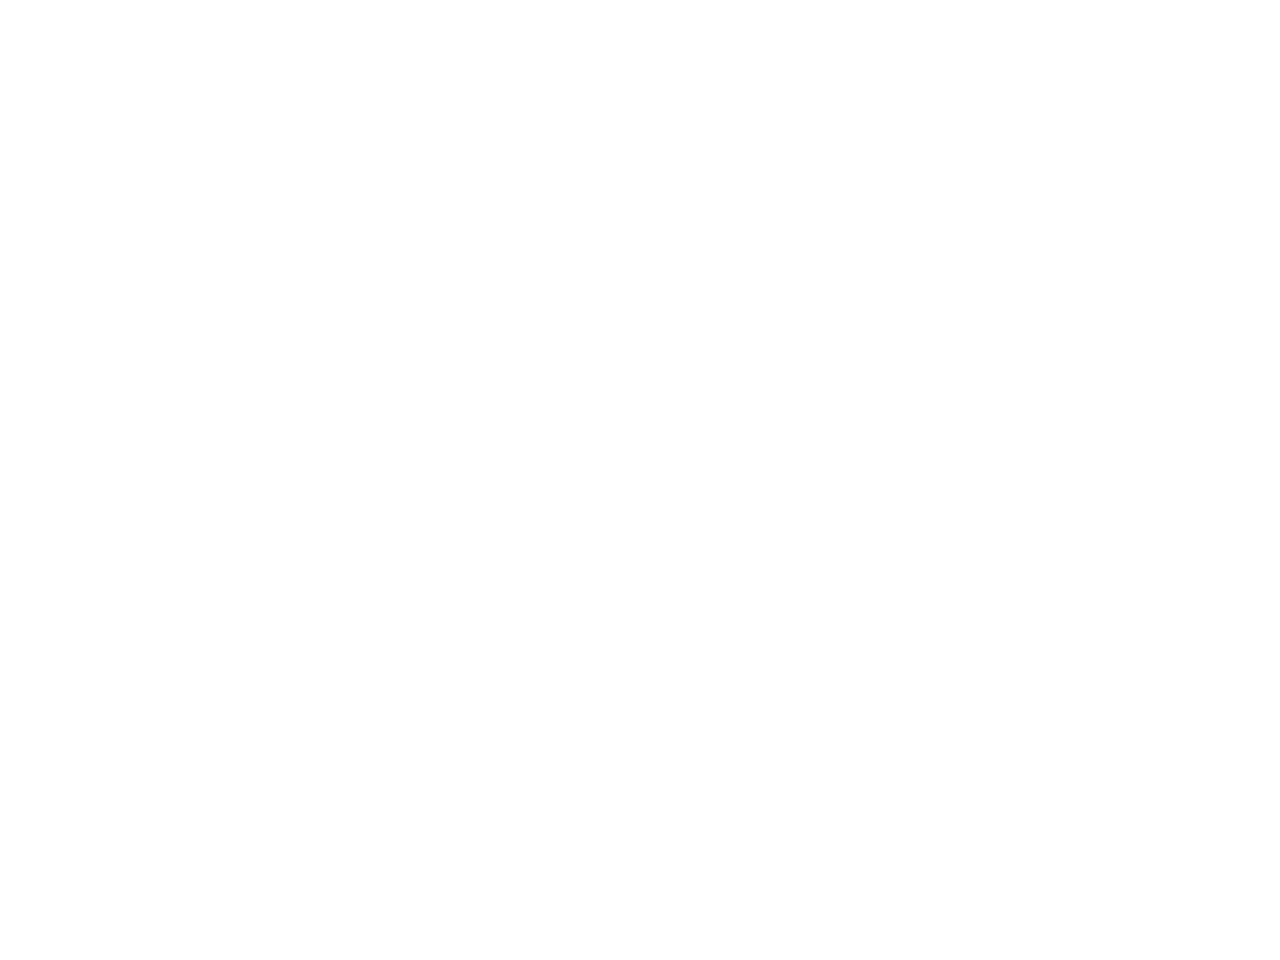

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [521]:
fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(pcr, N, xerr = up, fmt='.')
axes.set_ylabel('Experiment Number')
axes.set_xlabel('Proton Charge Radius');
plt.axvline ( x = popt, color= 'g');
print("The po value is same as the weighted mean")

# Problem 3: Selecting Data

In particle physics we sometimes want to measure a particlular particle that is created from the many resulting from a collision in a particle collider. In recording these collision events we typically measure other particles which are not the ones we are intersted in. The events we are interested in we reffer to as our signal, whereas the ones we are not interested in we reffer to as a background. 

**a)** The provided data set (Ep_data.txt) contains values of particle energy/momentum (E/p), the number of particles, and the uncertainty on the number of particles. Import the data and plot the number of particles vs. E/p and be sure to include the error bars on the particle counts. 

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83
 0.85 0.87 0.89 0.91 0.93 0.95 0.97 0.99 1.01 1.03 1.05 1.07 1.09 1.11
 1.13 1.15 1.17 1.19 1.21 1.23 1.25 1.27 1.29 1.31 1.33 1.35 1.37 1.39
 1.41 1.43 1.45 1.47 1.49 1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68
 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.96
 1.98 2.  ]
[ 8.900e-01  2.000e-01  5.000e-01  1.130e+00  9.500e-01 -4.700e-01
  5.000e-01 -5.000e-02 -1.000e-02  2.600e-01  1.400e-01  8.200e-01
  5.200e-01  2.600e-01  5.200e-01  6.200e-01  1.440e+00  9.600e-01
  1.770e+00  1.990e+00  2.240e+00  5.300e+00  7.240e+00  8.640e+00
  1.264e+01  1.342e+01  1.680e+01  1.906e+01  2.183e+01  2.307e+01
  2.293e+01  2.278e+01  2.119e+01  1.914e+01  1.810e+01  1.639e+01
  1.503e+01  1.335e+01  1.120e+01  1.025e+01  9.220e+00  8.670e+00
  8.380e+00  1.023e+01

<IPython.core.display.Javascript object>


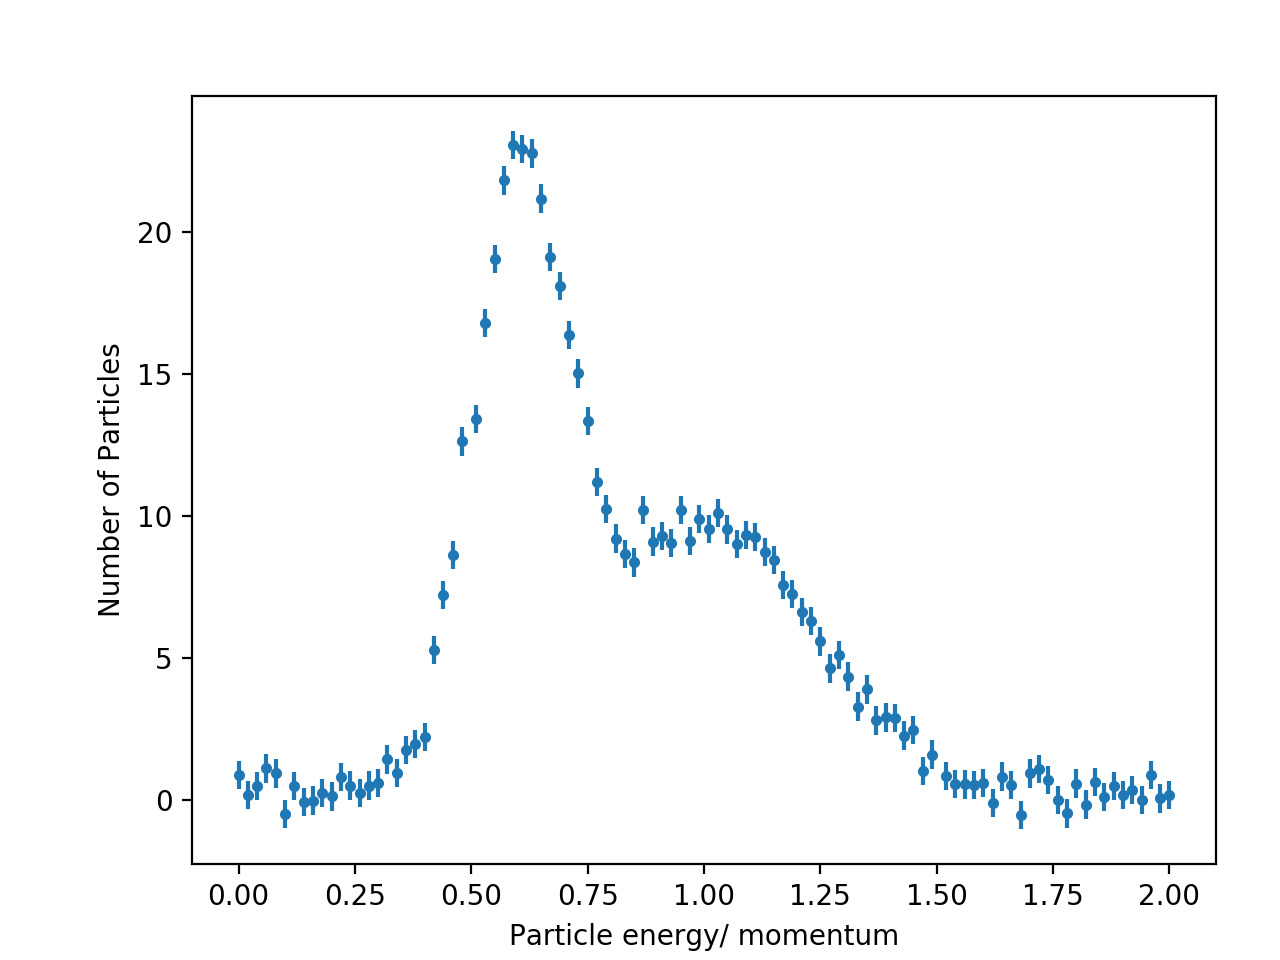

In [522]:
e = open ("/Users/tannishtha_nandi/Desktop/Ep_data.txt")
r, N, ue = np.loadtxt ("/Users/tannishtha_nandi/Desktop/Ep_data.txt", unpack = True)
print (r)
print (N)
print (ue)

fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(r, N, yerr = ue, fmt='.')
axes.set_ylabel('Number of Particles')
axes.set_xlabel('Particle energy/ momentum');

**b)** You should notice that there appear to be two clear distributions here. One which seems to be centered E/p = 0.6 and another around E/p = 1. The population at the lower E/p represent pions, whereas the population around E/p = 1 are electrons. For this exersice we will treat the pions as a background and the electrons as our signal. We will model each particle type to have a Gaussian distribution. Define two functions, one that returns a value computed from a Gaussian value, and anther function that returns a value computed from the sum of two Gaussian functions. Then make a fit to the data using the sum of two Gaussian functions. Each of your Gaussian functions can take the form of:

$G_1(x) = p_1 e^{-(x-p_2)^2/(2p_3)}$

where the $p_1, p_2,$ and $p_3$ are three parameters for the one Gaussian function. You will have 3 more different parameters for the other Gaussian function $G_2(x)$. 

Note: Did you get a negative value for the gaussian widths from your fit? We know that a negative value is not physical. Try to give some initial parameters for the fit to start with.

In [523]:
pions = r<1
electrons = r>1

def electron(x,a,b,c):
    return a*np.exp(-((x-b)**2)/(2*c))
def pion(x,d,e,f):
    return d*np.exp(-((x-e)**2)/(2*f))
def gauc (x,a,b,c,d,e,f):
    return ((a*np.exp(-((x-b)**2)/(2*c)))+(d*np.exp(-((x-e)**2)/(2*f))))

popt, pcov = curve_fit(gauc, r,N, sigma = ue, absolute_sigma = True)
print ('Popt', popt)
print ('Covariance',pcov)


Popt [9.74415553e+00 1.00366136e+00 5.93338492e-02 2.02093707e+01
 6.01230392e-01 1.05958691e-02]
Covariance [[ 1.89694965e-02  5.69432587e-06 -1.70257958e-04  6.72801531e-03
  -3.19625065e-05 -4.71470510e-06]
 [ 5.69432587e-06  7.59662808e-05 -2.62954965e-05  2.44115915e-03
   8.14668262e-06  2.46372611e-06]
 [-1.70257958e-04 -2.62954965e-05  1.51639803e-05 -1.14433843e-03
  -2.91391202e-06 -9.85902130e-07]
 [ 6.72801531e-03  2.44115915e-03 -1.14433843e-03  1.34649438e-01
   2.68237194e-04  5.83639879e-05]
 [-3.19625065e-05  8.14668262e-06 -2.91391202e-06  2.68237194e-04
   2.44558029e-06  2.80424680e-07]
 [-4.71470510e-06  2.46372611e-06 -9.85902130e-07  5.83639879e-05
   2.80424680e-07  1.49037206e-07]]


**c)** Calculate your $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value for the fit to the data.
Based on those statistics above is this a good fit? Explain.

**d)** On the same graph, plot your data, the total fit to it, and the single Gaussian functions computed using the parameter results from your 2 Gaussian function fit.

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83
 0.85 0.87 0.89 0.91 0.93 0.95 0.97 0.99 1.01 1.03 1.05 1.07 1.09 1.11
 1.13 1.15 1.17 1.19 1.21 1.23 1.25 1.27 1.29 1.31 1.33 1.35 1.37 1.39
 1.41 1.43 1.45 1.47 1.49 1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68
 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.96
 1.98 2.  ]
Chi sqaure 108.4209411082341
Degree of freedome 93
Reduced Chi square 1.1658165710562807
P value 0.13094980565355063


<IPython.core.display.Javascript object>


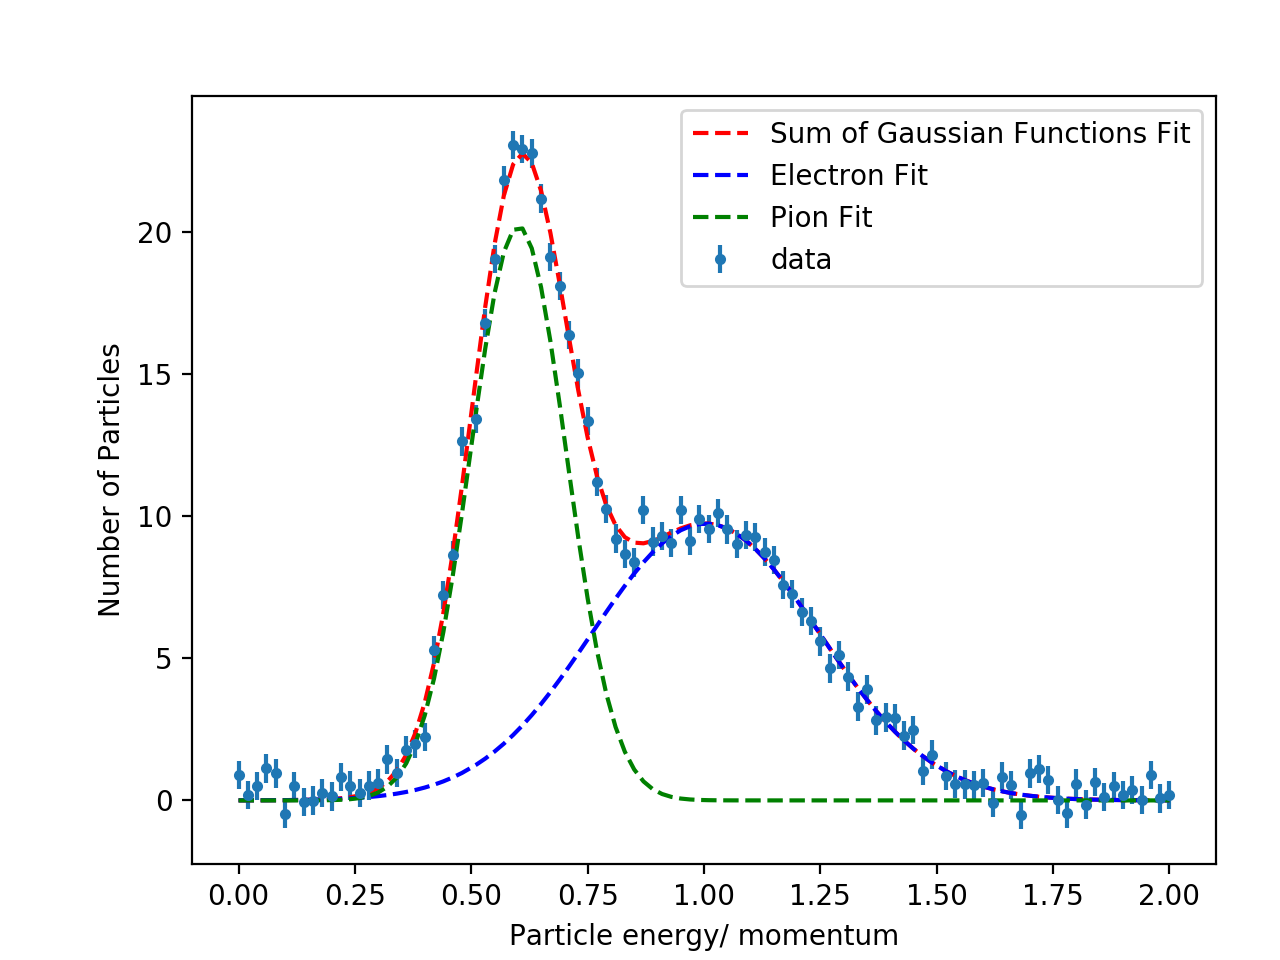

In [524]:
print(r)
chisq = np.sum ((N-gauc(r, *popt))**2/ue**2)
dof = len (N) - len(popt)-1
rchisq = chisq/dof
pvalue = sp.gammaincc(dof/2.0, chisq/2.0)

print ("Chi sqaure",chisq)
print ("Degree of freedome",dof)
print ("Reduced Chi square",rchisq)
print ("P value", pvalue)
a= popt[0]
b= popt[1]
c=popt[2]
d=popt[3]
e=popt[4]
f=popt[5]
x=r

fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(r, N, yerr = ue, fmt='.', label = 'data')
axes.set_ylabel('Number of Particles')
axes.set_xlabel('Particle energy/ momentum');
axes.plot(r,gauc(x,a,b,c,d,e,f),'r--',label= 'Sum of Gaussian Functions Fit')
axes.plot(r,electron(x,a,b,c),'b--', label = "Electron Fit")
axes.plot(r,pion(x,d,e,f),'g--', label= 'Pion Fit')
axes.legend();

**e)** We can use the $E/p$ distribution to try to select the maximum number of electron while minimizing the pions that *leak* into our electron signal. We can do this by requireing our selected sample to be larger than some $E/p$ threshold value. Any data that has an $E/p$ value lower then the threshold we throw it out. In a physics analysis this is called a cut. However we need to be careful, if we place a cut at $E/p$ that is too large we will have a really clean electron sample, but throw away a lot of good electrons. On the other hand if we make the $E/p$ cut too low we will keep most of our electrons, but let in a lot of background (pions). So we must compormise between clean data and statistics. To do this lets calculat the total number of electrons we have from $0.0 < E/p < 2$. This can be obtained by integrating (you can use scipy integrators, I used *integrate.quad* when doing this exersise)the electron contribution from our fit. We will call this number e_tot. Do a similar thing for the total pions and call that number pi_tot. 

For 10 equally spaced E/p thresholds between 0.3 and 0.8, calculate the number of electrons that are above each of the thresholds, we can call this array e_sig and can be obtained by integrating from the E/p threshold to the E/p = 2. Do a similar thing for the pion distribution. 



In [525]:
pitot= r<1
etot = r>1
N= 10
th=np.zeros(N)
limits = np.linspace(0.3,0.8,N)
print("Threshold Limits",limits)

e_tot = np.array(integrate.quad(electron, 0,2, args = (popt[0],popt[1],popt[2])))
print ("e_tot",e_tot)

pi_tot = np.array(integrate.quad(pion, 0,2, args = (popt[3],popt[4],popt[5])))
print ("pi_tot",pi_tot)


e_sig = np.zeros ((len(limits),2))
pi_sig = np.zeros ((len(limits),2))


for i in range (len(limits)):
    e_sig[i] = integrate.quad(electron, limits[i] ,2, args = (popt[0],popt[1],popt[2])) 
print ("e_sig", e_sig)

for i in range (len(limits)):
    pi_sig[i] = integrate.quad(pion, limits[i] ,2, args = (popt[3],popt[4],popt[5])) 
print ("pi_sig", pi_sig)


Threshold Limits [0.3        0.35555556 0.41111111 0.46666667 0.52222222 0.57777778
 0.63333333 0.68888889 0.74444444 0.8       ]
e_tot [5.94932691e+00 7.38604785e-11]
pi_tot [5.21448013e+00 8.82013477e-09]
e_sig [[5.93793428e+00 4.16922966e-13]
 [5.92624202e+00 2.11293846e-13]
 [5.90484712e+00 2.19861422e-13]
 [5.86767417e+00 9.62920234e-14]
 [5.80634752e+00 6.44634071e-14]
 [5.71027992e+00 5.21719622e-08]
 [5.56738708e+00 6.18104132e-14]
 [5.36557365e+00 5.95698341e-14]
 [5.09493127e+00 4.81974560e-08]
 [4.75030539e+00 9.77171476e-09]]
pi_sig [[5.20553905e+00 2.24993849e-09]
 [5.17015252e+00 8.03395668e-10]
 [5.04565431e+00 2.70505847e-10]
 [4.71616686e+00 6.66606207e-11]
 [4.06010455e+00 1.30594571e-11]
 [3.07713387e+00 2.92599939e-12]
 [1.96882534e+00 4.53063180e-13]
 [1.02841789e+00 6.75844058e-14]
 [4.27946700e-01 7.90203430e-09]
 [1.39443998e-01 7.18242150e-09]]


**f)** Plot the ratios e_sig/e_tot and pi_sig/pi_tot as a function of E/p threshold on the same graph. 

Ratio of Electrons [[9.98085055e-01 5.64473687e-03]
 [9.96119747e-01 2.86071591e-03]
 [9.92523559e-01 2.97671266e-03]
 [9.86275297e-01 1.30370159e-03]
 [9.75967131e-01 8.72772671e-04]
 [9.59819490e-01 7.06358302e+02]
 [9.35801168e-01 8.36853679e-04]
 [9.01879108e-01 8.06518388e-04]
 [8.56387848e-01 6.52547303e+02]
 [7.98460979e-01 1.32299641e+02]]
Ratio of Pions [[9.98285335e-01 2.55091169e-01]
 [9.91499131e-01 9.10865524e-02]
 [9.67623651e-01 3.06691286e-02]
 [9.04436634e-01 7.55777803e-03]
 [7.78621155e-01 1.48064145e-03]
 [5.90113259e-01 3.31740894e-04]
 [3.77568863e-01 5.13669227e-05]
 [1.97223474e-01 7.66251396e-06]
 [8.20689098e-02 8.95908567e-01]
 [2.67416874e-02 8.14321061e-01]]
Percentage of Electrons [[9.98085055e+01 5.64473687e-01]
 [9.96119747e+01 2.86071591e-01]
 [9.92523559e+01 2.97671266e-01]
 [9.86275297e+01 1.30370159e-01]
 [9.75967131e+01 8.72772671e-02]
 [9.59819490e+01 7.06358302e+04]
 [9.35801168e+01 8.36853679e-02]
 [9.01879108e+01 8.06518388e-02]
 [8.56387848e+01

<IPython.core.display.Javascript object>


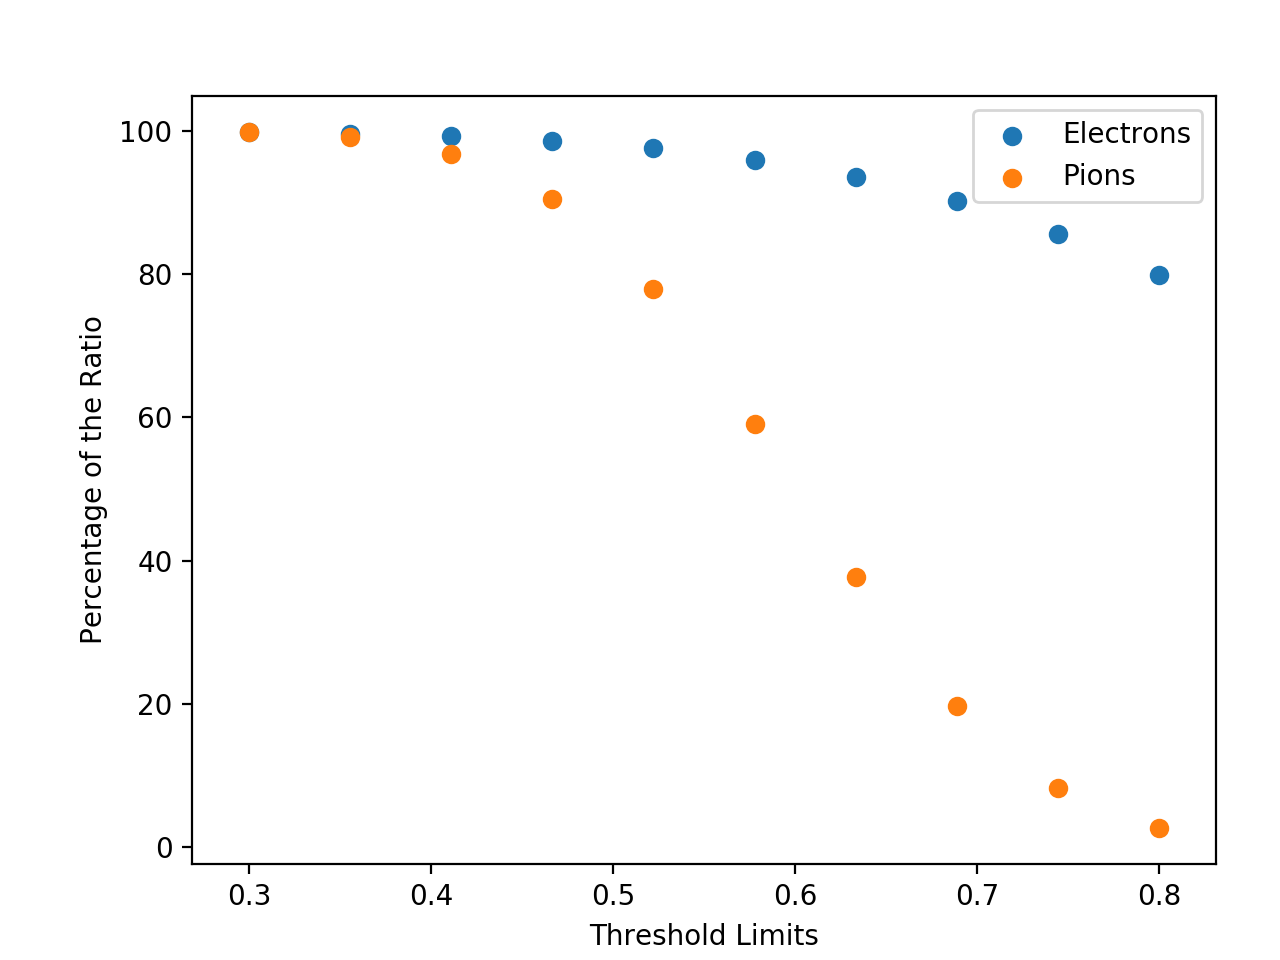

In [532]:
er= e_sig/e_tot
pr= pi_sig/pi_tot
print('Ratio of Electrons',er)
print('Ratio of Pions',pr)

erpercent = er*100
prpercent = pr*100
print('Percentage of Electrons', erpercent)
print('Percentage of Pions', prpercent)


fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.set_ylabel('Percentage of the Ratio')
axes.set_xlabel('Threshold Limits');
plt.scatter(limits,erpercent[:,0],label= 'Electrons')
plt.scatter(limits,prpercent[:,0],label = "Pions")
axes.legend();

**g)** When the e_sig/etot ratio is 90%, how what percentage of the pion distribution is contaminating our electron sample?

In [483]:
print ("Electron Ratio :90.0684%", "Pions Contamination: 19.1286%") #From graph

Electron Ratio :90.0684% Pions Contamination: 19.1286%
